In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# Marketing Leads in India 

The goal of this notebook is to identify the factors that contribute greatly towards lead conversion.

In [2]:
leads = pd.DataFrame(pd.read_excel('Marketing_Leads_India.xlsx'))

In [3]:
_ = ['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

#only for auto complete

# Checking the Data Set

Overview of Nan Values

<AxesSubplot:>

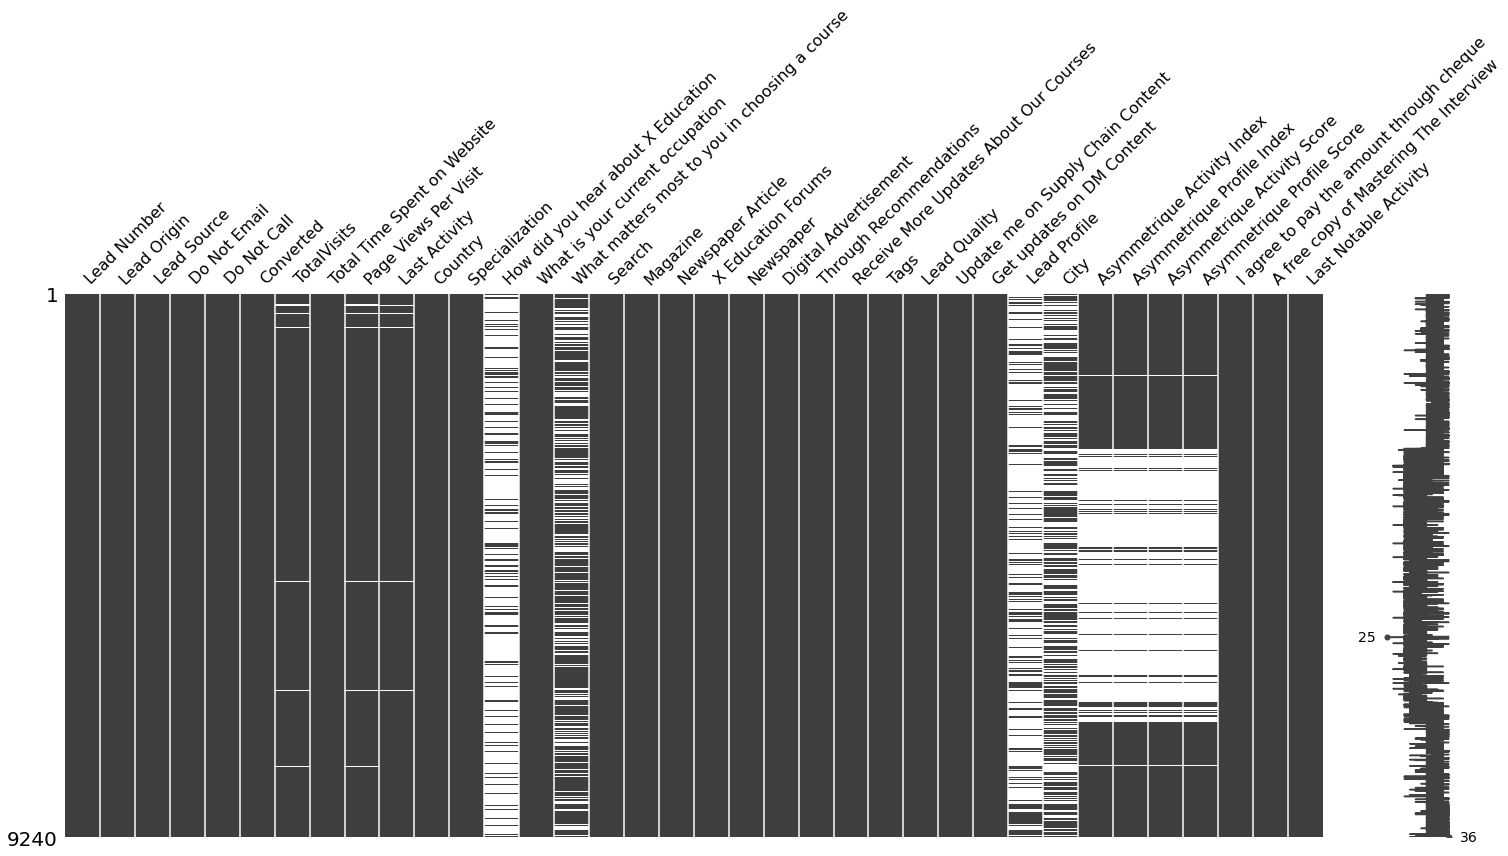

In [4]:
msno.matrix(leads)

In [5]:
leads.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
leads.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [9]:
original_shape = leads.shape
original_shape

(9240, 36)

# Exploring the Data

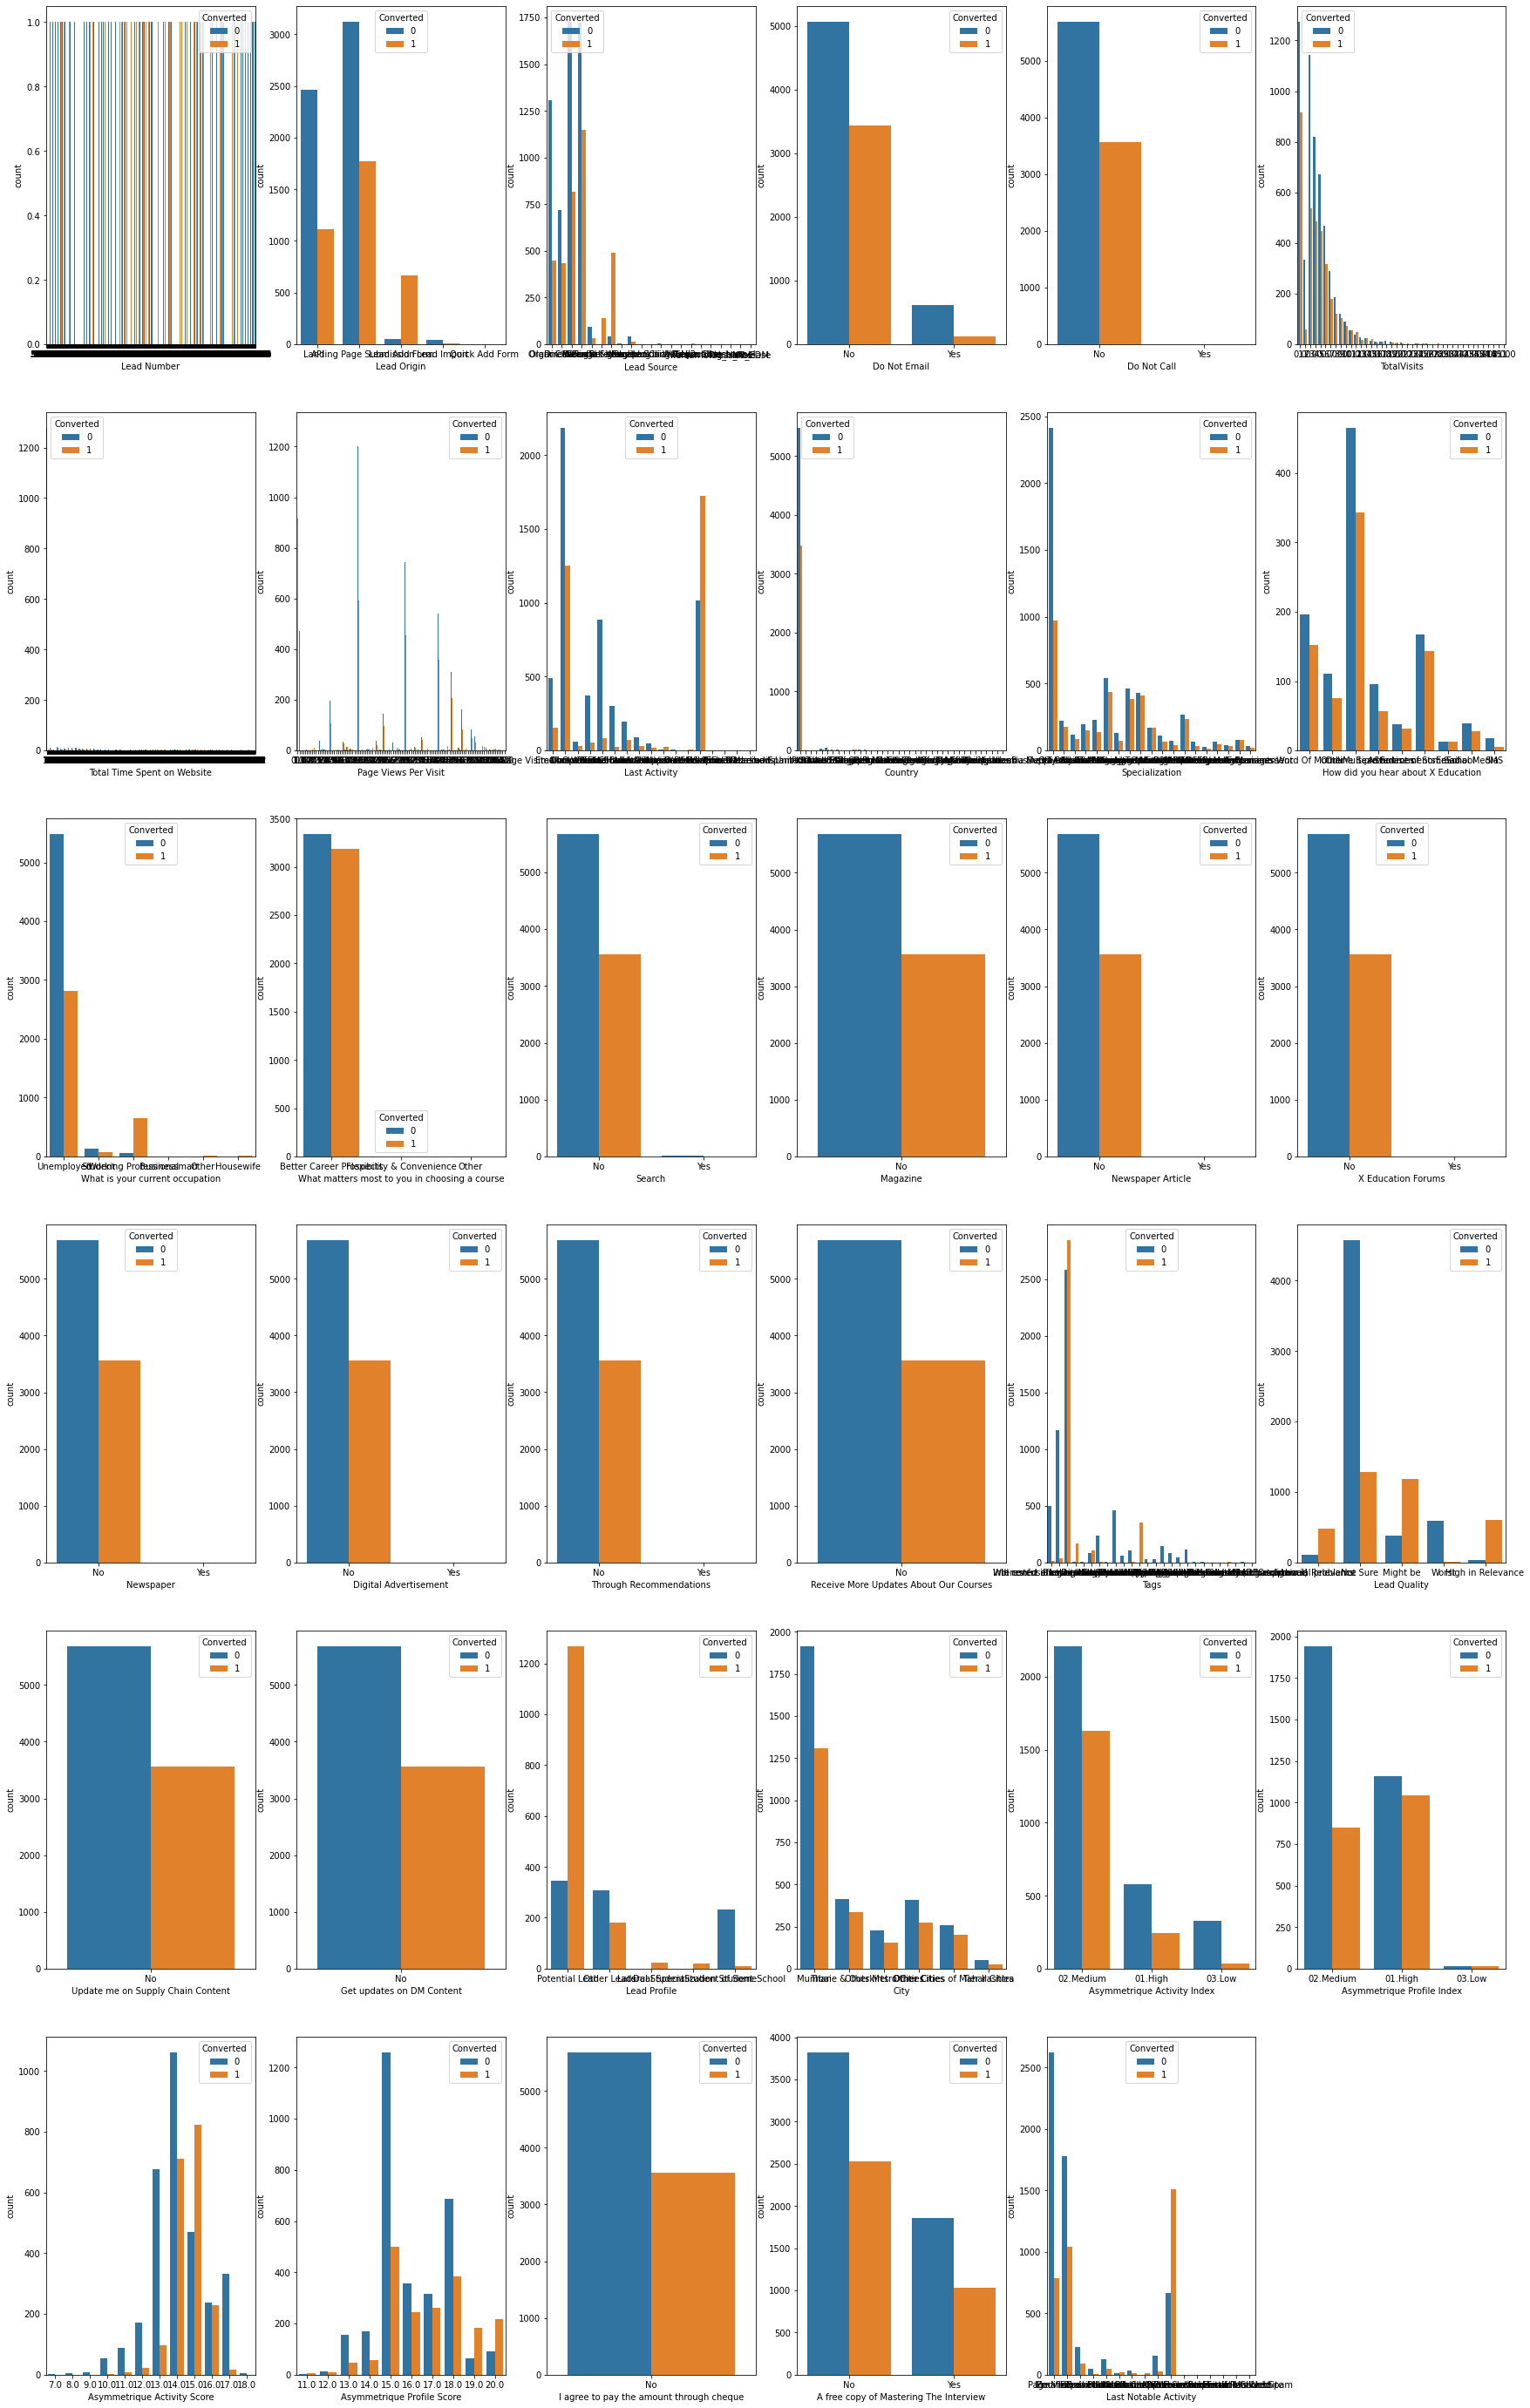

In [10]:
def mass_charts():
    i = 1
    plt.figure(figsize = (30,50))
    for feature in [col for col in leads.columns if col!='Converted' ]:
        plt.subplot(6,6,i),  
        sns.countplot(x = feature , hue='Converted', data = leads)
    
        i +=1

mass_charts()

# Close up View of Significant Charts

Lead Origin

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

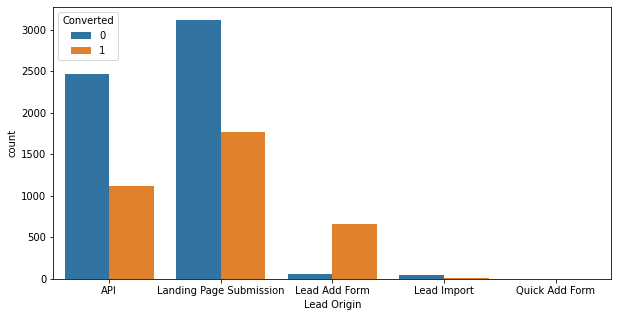

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=leads, x='Lead Origin', hue='Converted')

Lead Source

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

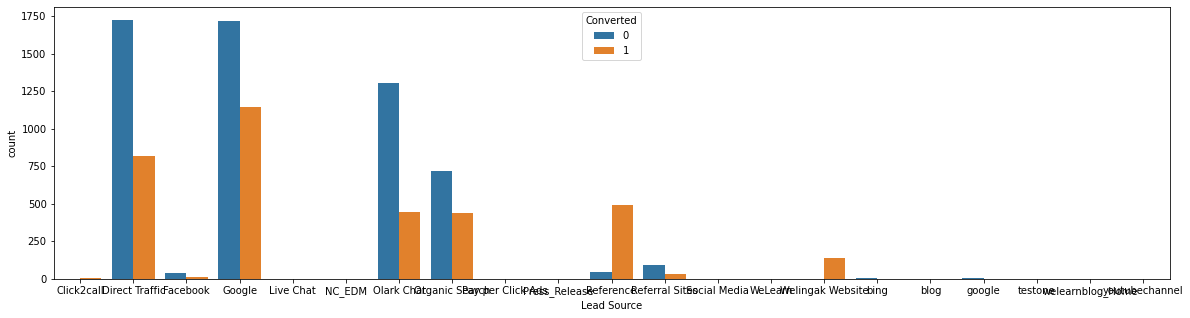

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['Lead Source'].sort_values(ascending=True), hue='Converted')

Total Visits

<AxesSubplot:xlabel='TotalVisits', ylabel='count'>

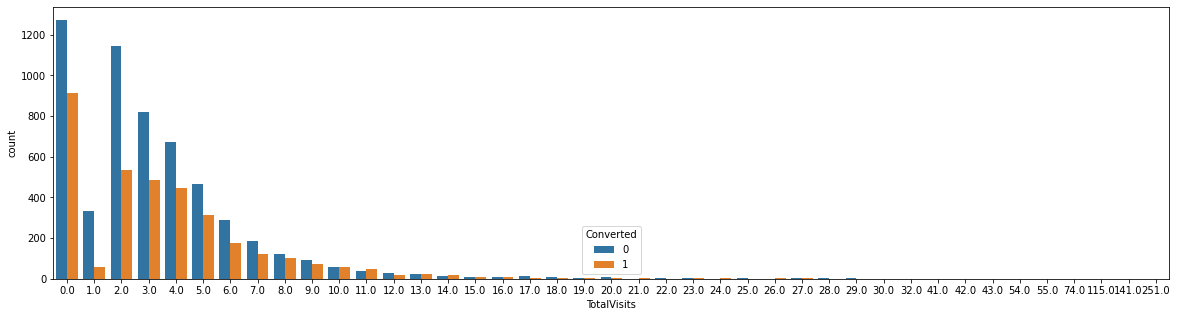

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['TotalVisits'].sort_values(ascending=True), hue='Converted')


Total Time Spent on Website

<Figure size 1440x360 with 0 Axes>

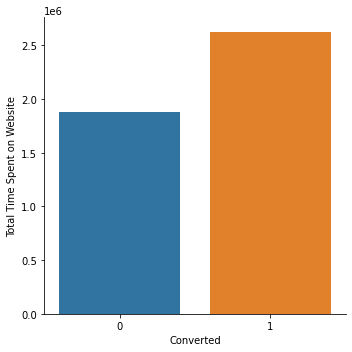

In [14]:
lead_graph = leads.groupby('Converted')['Total Time Spent on Website'].sum().reset_index()
plt.figure(figsize=(20,5))
sns.catplot(data=lead_graph, x='Converted', y='Total Time Spent on Website', kind='bar')

Page Views Per Visit

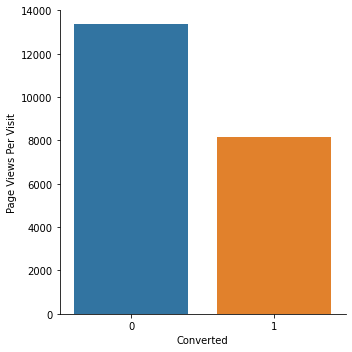

In [15]:
page_view_graph = leads[['Page Views Per Visit','Converted']].groupby('Converted')['Page Views Per Visit'].sum().reset_index()
sns.catplot(data=page_view_graph, kind='bar', x='Converted', y='Page Views Per Visit')

Last Activity

<AxesSubplot:xlabel='Last Activity', ylabel='count'>

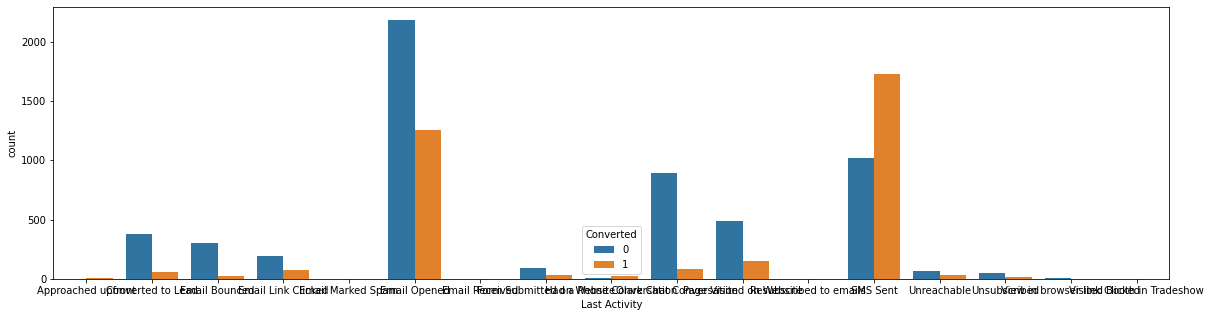

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['Last Activity'].sort_values(ascending=True), hue='Converted')

Specialization

<AxesSubplot:xlabel='Specialization', ylabel='count'>

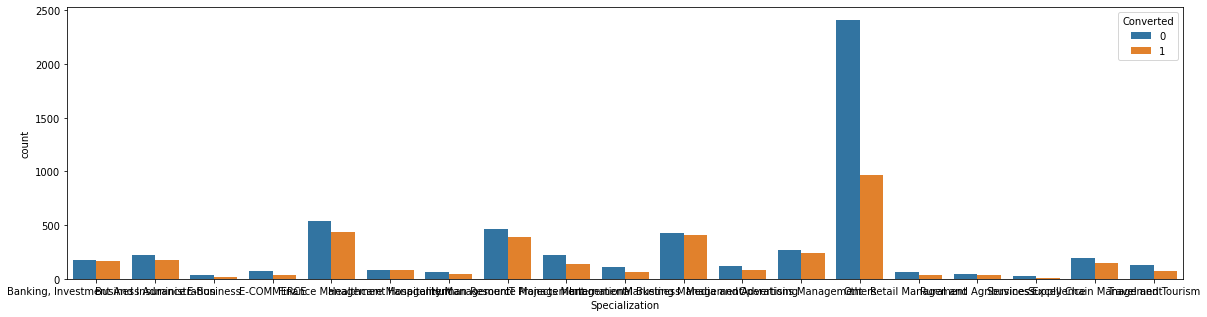

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['Specialization'].sort_values(ascending=True), hue='Converted')

How did you hear about X Education

<AxesSubplot:xlabel='How did you hear about X Education', ylabel='count'>

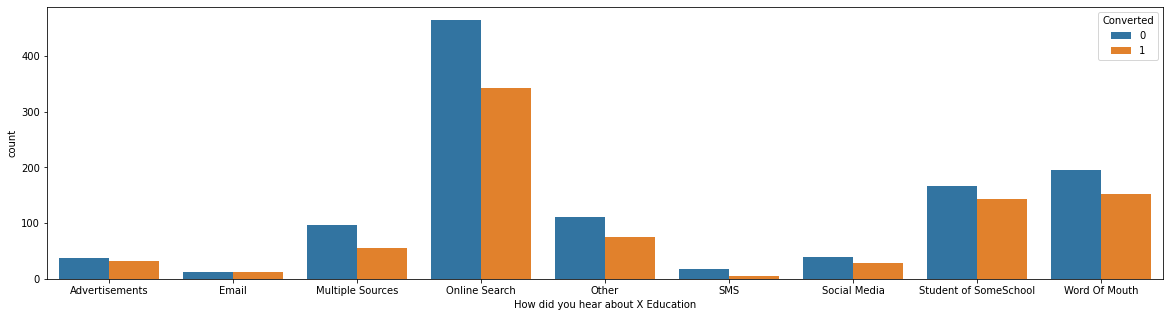

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['How did you hear about X Education'].sort_values(ascending=True), hue='Converted')

Lead Quality

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

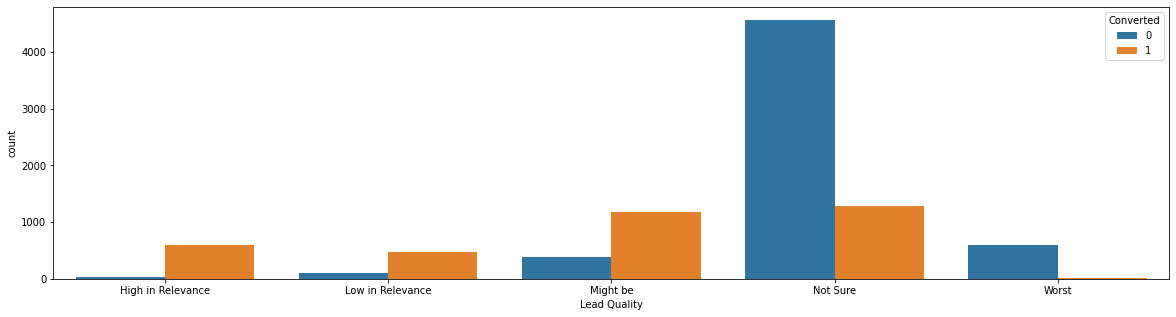

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['Lead Quality'].sort_values(ascending=True), hue='Converted')

Lead Profile

<AxesSubplot:xlabel='Lead Profile', ylabel='count'>

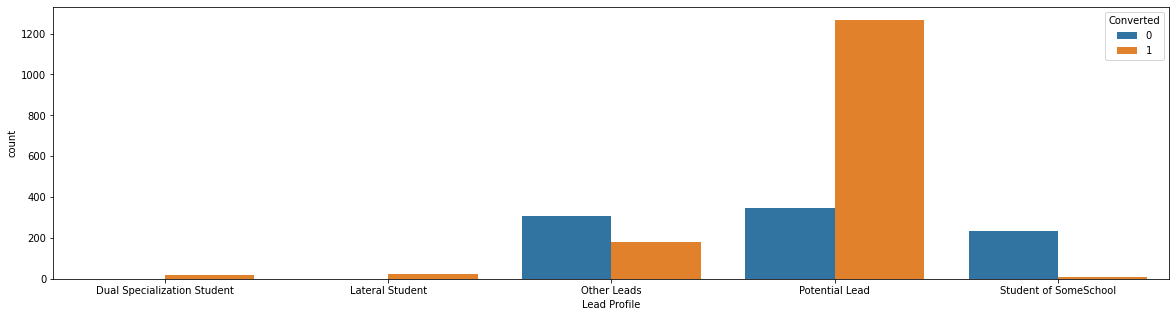

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['Lead Profile'].sort_values(ascending=True), hue='Converted')

Last Notable Activity

<AxesSubplot:xlabel='Last Notable Activity', ylabel='count'>

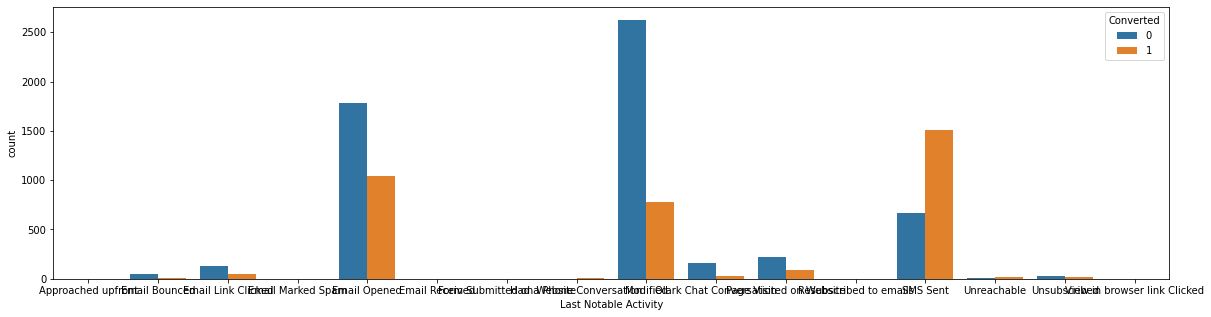

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(data=leads, x=leads['Last Notable Activity'].sort_values(ascending=True), hue='Converted')

In [22]:
last_notable_graph = leads.groupby('Last Notable Activity')['Converted'].sum().reset_index().sort_values(by='Converted', ascending=False)
last_notable_graph

,Last Notable Activity,Converted
12,SMS Sent,1508
4,Email Opened,1044
8,Modified,783
10,Page Visited on Website,93
2,Email Link Clicked,45
9,Olark Chat Conversation,25
13,Unreachable,22
14,Unsubscribed,14
7,Had a Phone Conversation,13
1,Email Bounced,9


In [23]:
tag_graph = leads.groupby('Tags')['Converted'].sum().reset_index().sort_values(by='Converted', ascending=False)
tag_graph

,Tags,Converted
19,Will revert after reading the email,2843
2,Closed by Horizzon,356
10,Lost to EINS,171
1,Busy,105
14,Ringing,34
8,Interested in other courses,13
4,Graduation in progress,7
7,Interested in Next batch,5
24,switched off,4
20,in touch with EINS,3


# Cleaning Data for Machine Learning

In [24]:
ml_leads = leads.copy()
test_leads = leads.copy()
ml_leads.shape


(9240, 36)

Snapping columns with nan values over 30% of total rows.

In [25]:
percent_missing = ml_leads.isnull().sum() * 100 / len(ml_leads)
missing_value_df = pd.DataFrame({'column_name': ml_leads.columns,
                                 'percent_missing': percent_missing})
to_drop = list(missing_value_df[missing_value_df['percent_missing']>30]['column_name'])
to_drop

['How did you hear about X Education',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [26]:
print(f"Before Drop Data: {ml_leads.shape}")
ml_leads.drop(columns=to_drop, inplace=True)
test_leads.drop(columns=to_drop, inplace=True)
print(f'After Data Drop {ml_leads.shape}')

Before Drop Data: (9240, 36)
After Data Drop (9240, 29)


Snapping Columns with Single Value

In [27]:
def single_value_drop():
    print(f"Before Drop Data: {ml_leads.shape}")

    counts = ml_leads.nunique()
    to_del = [i for i,v in enumerate(counts) if v == 1]
    print(to_del)
    ml_leads.drop(columns = ml_leads.columns[to_del], inplace=True)
    
    print(f'After Data Drop {ml_leads.shape}')

single_value_drop()

Before Drop Data: (9240, 29)
[15, 21, 24, 25, 26]
After Data Drop (9240, 24)


Snapping Nan Values

In [28]:
ml_leads.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

# ML Preprocessing

In [29]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder

In [30]:
numerical = OrdinalEncoder()
column_names = ml_leads.columns
ordinal_scaled = numerical.fit_transform(ml_leads)
ordinal_scaled_df = pd.DataFrame(ordinal_scaled, columns=column_names).drop(columns=['Lead Number','Country'])
ordinal_scaled_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,8.0
1,0.0,7.0,0.0,0.0,0.0,5.0,644.0,47.0,5.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,0.0,4.0
2,1.0,1.0,0.0,0.0,1.0,2.0,1435.0,33.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.0,2.0,1.0,4.0
3,1.0,1.0,0.0,0.0,0.0,1.0,305.0,1.0,13.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,0.0,8.0
4,1.0,3.0,0.0,0.0,1.0,2.0,1340.0,1.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.0,2.0,0.0,8.0


In [31]:
transform = VarianceThreshold(threshold=0.55)
features = ordinal_scaled_df.drop(columns='Converted')
labels = ordinal_scaled_df['Converted']
transform.fit_transform(features)
data_transformed = features.loc[:, transform.get_support()]




Joining to data_transformed and labels to delete NAN

In [32]:
final_data = data_transformed.join(labels)
print(final_data.shape)
final_data.dropna(inplace=True)
print(final_data.shape)

(9240, 10)
(9074, 10)


In [33]:
final_data.head()

,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,Lead Quality,Last Notable Activity,Converted
0,6.0,0.0,0.0,0.0,10.0,13.0,8.0,1.0,8.0,0.0
1,7.0,5.0,644.0,47.0,5.0,13.0,14.0,3.0,4.0,0.0
2,1.0,2.0,1435.0,33.0,5.0,1.0,19.0,2.0,4.0,1.0
3,1.0,1.0,305.0,1.0,13.0,11.0,14.0,3.0,8.0,0.0
4,3.0,2.0,1340.0,1.0,1.0,13.0,19.0,2.0,8.0,1.0


# Applying ML Methods

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [35]:
train = final_data.drop(columns='Converted')
test = final_data['Converted']
X_train, X_test, y_train, y_test=train_test_split(train,test ,test_size=0.30,random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6351, 9) (2723, 9) (6351,) (2723,)


In [36]:
methods = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]
for method in methods:
    method.fit(X_train, y_train)
    y_pred = method.predict(X_test)

    print(f'Method: {str(method)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

Method: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1701
         1.0       0.92      0.85      0.89      1022

    accuracy                           0.92      2723
   macro avg       0.92      0.90      0.91      2723
weighted avg       0.92      0.92      0.92      2723

------------------------------ 

Method: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      1701
         1.0       0.73      0.67      0.70      1022

    accuracy                           0.78      2723
   macro avg       0.77      0.76      0.76      2723
weighted avg       0.78      0.78      0.78      2723

------------------------------ 

Method: SVC()
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.80      1701
         1.0       0.70      0.54      0.61      1022

    accuracy                          

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest is the best method with an accuracy score of 92%

In [37]:
best_method= RandomForestClassifier()
best_method.fit(X_train, y_train)
y_pred = best_method.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1701
         1.0       0.92      0.85      0.89      1022

    accuracy                           0.92      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.92      0.92      0.92      2723



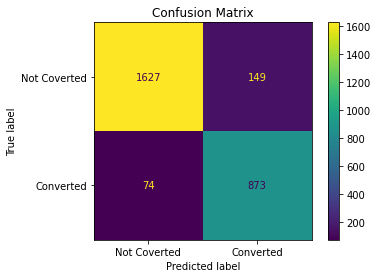

In [38]:
cm = confusion_matrix(best_method.predict(X_test), y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Not Coverted", 'Converted'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [99]:
right = 1627+873
wrong = 149 + 74
percentage = 100 - ((wrong/right)*100) 
percentage

91.08

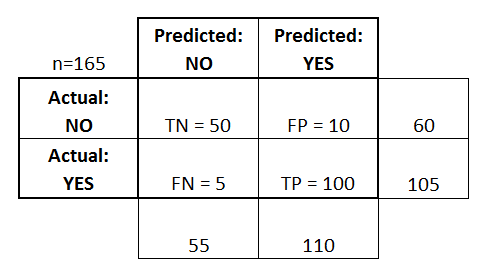

In [94]:
from IPython import display
display.Image("confusion_matrix2.png")

Text(0.5, 1.0, 'Feature Importance Ranking')

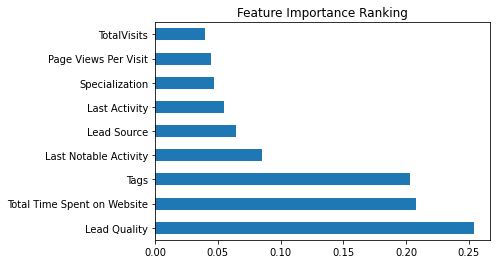

In [39]:
feature_importances=best_method.feature_importances_
feature_importances_df=pd.DataFrame({'Variable':list(X_train), 'Variable importance':feature_importances})

feature_importances_df.sort_values('Variable importance',ascending=False)

feat_importances = pd.Series(best_method.feature_importances_, index=train.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance Ranking")

In [82]:
y_pred = best_method.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})




,Actual,Predicted
1540,1.0,1.0
3134,0.0,0.0
2689,1.0,1.0
4262,0.0,0.0
6072,0.0,0.0
...,...,...
764,1.0,1.0
2154,1.0,0.0
1675,1.0,1.0
648,0.0,0.0


Benefit:
1. Faster way of sieving through leads.
2. High quality lead generation based on past data. 
3. Intern can focus on optimizing high quality leads first before the low quality ones.

Ask:
1. Export Data on Hubspot Contacts.
2. Ability to create my own property.

Future WorkFlow
1. Analysis on Hubspot Data
2. Creation of Lead Scores in Hubspot. -https://knowledge.hubspot.com/crm-setup/set-up-score-properties-to-qualify-leads




Work Process
1. Apollo Leads Importation > Lead Scoring Filter > Intern Optimize High Scoring Leads First > High Quality leads reach Gab and George first.
2. Intern Optimize Low Quality Leads > Low Quality leads reach Gab and George last.